<a href="https://colab.research.google.com/github/RZDN/Complejidad_Algoritmica_RZD/blob/main/EXF_PREGUNTA_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git 2>/dev/null

In [15]:
from algorithmic_complexity.aclib import graphstuff as gs
import numpy as np
import networkx as nx
import heapq as hq
import math

In [3]:
def relax(G, u, v):
  g_u = G.nodes[u]["cost"]
  g_v = G.nodes[v]["cost"]
  w_uv = G.edges[u, v]["weight"]
  if g_u + w_uv < g_v:
    G.nodes[v]["cost"] = g_u + w_uv
    G.nodes[v]["path"] = u
    return True
  return False

In [4]:
def bellmanFord(G, s):
  n = G.number_of_nodes()
  for u in G.nodes:
    G.nodes[u]["cost"] = math.inf
    G.nodes[u]["path"] = -1

  G.nodes[s]["cost"] = 0

  for _ in range(n - 1):
    for u, v in G.edges:
      relax(G, u, v)

  for u, v in G.edges:
    if relax(G, u, v):
      return False
  return True

In [5]:
def dijkstra(G, s):
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['path']    = -1
    G.nodes[u]['cost']    = math.inf

  G.nodes[s]['cost'] = 0
  q = [(0, s)]
  while q:
    g_u, u = hq.heappop(q)
    if not G.nodes[u]['visited']:
      G.nodes[u]['visited'] = True
      for v in G.neighbors(u):
        if not G.nodes[v]['visited']:
          if relax(G, u, v):
            hq.heappush(q, (G.nodes[v]["cost"], v))

  path = [0]*G.number_of_nodes()
  for v, info in G.nodes.data():
    path[v] = info['path']

  return path

In [20]:
def johnsson(G):
  n = G.number_of_nodes()
  G2 = G.copy()

  G2.add_node(n)
  G2.add_edge(n, n-1, weight=0)

  if not bellmanFord(G2, n): # Ciclo negativo
    return None

  G3 = G.copy()
  for u, v in G3.edges:
    C_uv = G.edges[u, v]["weight"]
    P_u = G2.nodes[u]["cost"]
    P_v = G2.nodes[v]["cost"]
    G3.edges[u, v]["weight"] = C_uv + P_u - P_v

  path = []
  for u in range(n):
    path.append(dijkstra(G3, u))

  return path

In [21]:
%%file 1.wel
0 3 2
1 0 6
1 2 3
2 0 4
2 3 5
3 1 -7
3 2 -3

Overwriting 1.wel


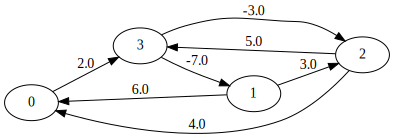

In [22]:
G = nx.read_weighted_edgelist("1.wel", create_using=nx.DiGraph, nodetype=int)
gs.nx2gv(G, weighted=True)

In [23]:
johnsson(G)

[[-1, 3, 1, 0], [1, -1, 1, 0], [2, 3, -1, 2], [1, 3, 1, -1]]

In [24]:
%timeit johnsson(G)

The slowest run took 4.98 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 474 µs per loop


**Warshal Algoritmo**

In [10]:
def relax1(cost, path, cost_uv, path_kj, u, v):
  if cost[u] + cost_uv < cost[v]:
    cost[v] = cost[u] + cost_uv
    path[v] = path_kj

def floydWarshall(G):
  n = len(G)
  cost = G.copy()
  path = np.full((n, n), -1)

  for (i, j), _ in np.ndenumerate(path):
    path[i, j] = i if G[i, j] != np.Inf else -1;

  for k in range(n):
    for i in range(n):
      for j in range(n):
        if i != j and i != k and k != j:
          relax1(cost[i], path[i], cost[k, j], path[k, j], k, j)
  
  return cost, path

In [13]:
%%file 2.adjmatrix
0 5 0 0 0 0 0 0
0 0 1 4 0 0 0 0
0 9 0 0 6 0 5 0
0 8 0 0 0 8 0 0
0 0 0 0 0 0 7 1
0 9 0 2 0 0 5 0
0 0 0 0 4 0 0 0
0 0 0 0 0 5 6 0

Writing 2.adjmatrix


In [26]:

G1 = np.fromfile("2.adjmatrix", sep=" ").reshape((8, 8))
G1[G1 == 0] = np.Inf


In [27]:
cost, path = floydWarshall(G1)
print(cost)
print(path)

[[inf  5.  6.  9. 12. 17. 11. 13.]
 [inf inf  1.  4.  7. 12.  6.  8.]
 [inf  9. inf 13.  6. 12.  5.  7.]
 [inf  8.  9. inf 15.  8. 13. 16.]
 [inf 15. 16.  8. inf  6.  7.  1.]
 [inf  9. 10.  2.  9. inf  5. 10.]
 [inf 19. 20. 12.  4. 10. inf  5.]
 [inf 14. 15.  7. 10.  5.  6. inf]]
[[-1  0  1  1  2  3  2  4]
 [-1 -1  1  1  2  3  2  4]
 [-1  2 -1  1  2  7  2  4]
 [-1  3  1 -1  2  3  5  4]
 [-1  5  1  5 -1  7  4  4]
 [-1  5  1  5  6 -1  5  4]
 [-1  5  1  5  6  7 -1  4]
 [-1  5  1  5  6  7  7 -1]]


In [28]:
%timeit floydWarshall(G1)

1000 loops, best of 5: 647 µs per loop


**DIFERENCIA**
Ambos algoritmos Buscan el camino optimo hacia todos los nodos, entonces la principal diferencia entre lso dos algoritmos mostrados anteriormente es que el algoritmo de  JHONSON trabaja con pesos en los arcos negativos y el algoritmo WARSHAL solo con pesos en los arcos positivos. Ademas JHONSON hace uso de los algoritmo Bellman-Ford para detectar ciclos negativos y Dijktra para todos los nodos y hallar la solucion.